## Run and Plot an Example

In [1]:
import sys
sys.path.append('../')
from model.params_f16 import F16Params, Controls
import numpy as np
import matplotlib.pyplot as plt
from model.sim_f16 import simulate, simulate_realtime
from tools.lin_f16 import trim_f16 as trimmer
from model.eqm import eqm
%matplotlib widget

c:\git\StevensAndLewis\SaL\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.13.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
params = F16Params()
params.alt_ft = 20000.0
params.VT_ftps = 502.0
params.xcg = 0.30

controls = Controls()

X0, U0 = trimmer(controls, params)

Trim results:
Throttle (0-1): 0.36
Elevator (deg): -2.75
Alpha (deg): 5.48
Aileron (deg): 0.00
Rudder (deg): -0.00
Beta (deg): -0.00


#### Set Time and Controls

In [3]:
from copy import deepcopy
t = np.linspace(0, 10, 10*200+1)
controls_list = [deepcopy(U0) for _ in t]

#### Create Elevator Doublet

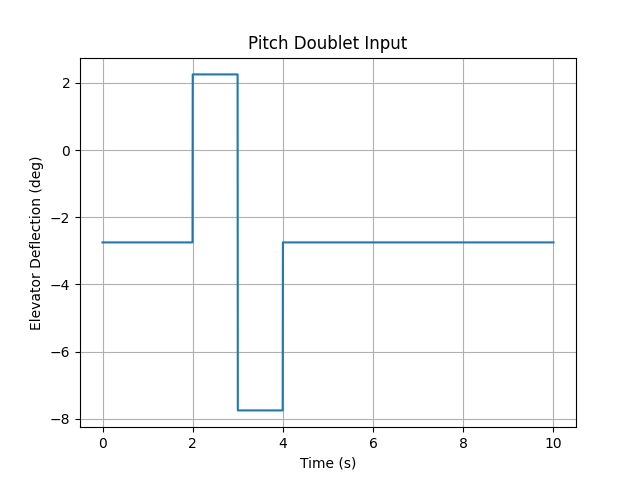

In [4]:
for i, time_val in enumerate(t):
    if 2.0 <= time_val < 3.0:  # 2 to 3 seconds
        controls_list[i].elev_deg = U0.elev_deg + 5.0
    elif 3.0 <= time_val < 4.0:  # 3 to 4 seconds
        controls_list[i].elev_deg = U0.elev_deg - 5.0

plt.figure()
plt.plot(t, [ctrl.elev_deg for ctrl in controls_list])
plt.xlabel('Time (s)')
plt.ylabel('Elevator Deflection (deg)')
plt.title('Pitch Doublet Input')
plt.grid()
plt.show()

#### Run Simulation

In [5]:
y, outputs = simulate(func=eqm, X0=X0, t=t, controls_list=controls_list, params=params)

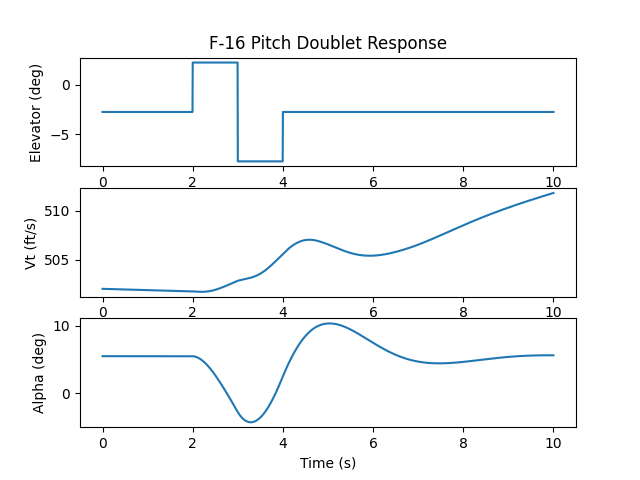

In [6]:
elev_deg = np.zeros(t.shape)
for i in range(t.shape[0]):
    elev_deg[i] = controls_list[i].elev_deg

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, elev_deg, label='elev (deg)')
plt.ylabel('Elevator (deg)')
plt.title('F-16 Pitch Doublet Response')
plt.subplot(3, 1, 2)
plt.plot(t, y[0, :], label='Vt (ft/s)')
plt.ylabel('Vt (ft/s)')
plt.subplot(3, 1, 3)
plt.plot(t, y[1, :]*180/np.pi, label='alpha (deg)')
plt.ylabel('Alpha (deg)')
plt.xlabel('Time (s)')
plt.show()